## November 12, Lecture 29 
## Pandas

In [ ]:
## What is Pandas? 
## Pandas is a package of tools for doing Data Science
## Pandas is installed on top of Python
## Pandas was installed with Anaconda, so its on your computers


In [9]:
import pandas as pd
# why do we do this? 
# saves us typing pandas

In [10]:
## A Pandas Series is like a combination of a list and a dictionary
# The word 'index' is used to associate


In [244]:
scores = pd.Series([44, 32, 19, 67, 23, 23, 92, 47, 47, 78, 84])
scores

0     44
1     32
2     19
3     67
4     23
5     23
6     92
7     47
8     47
9     78
10    84
dtype: int64

In [248]:
## a Pandas series acts a lot like a list
## you can index and slice
scores[3]
scores[3:6]

3    67
4    23
5    23
dtype: int64

In [125]:
## Series calculations
## mean, median, mode, quartiles, sd, count
print(scores.mean(), scores.std(), scores.median(), sep='\t')


50.54545454545455	26.051347897426098	47.0


In [122]:
# there could be multiple modes, so mode returns a Series
print(scores.mode())

0    23
1    47
dtype: int64


In [121]:
# 5-Number summary
print(scores.quantile([1.0, 0.75, 0.5, 0.25, 0]))

1.00    92.0
0.75    72.5
0.50    47.0
0.25    27.5
0.00    19.0
dtype: float64


In [51]:
# Series value counts create a series where 
# the key is the data, and the value is its count in the Series
ages = pd.Series([18, 19, 20, 20, 20, 17, 18, 24, 25, 35, 22, 20, 21, 21, 20, 23, 23, 19, 19, 19, 20, 21])
ages.value_counts()


20    6
19    4
21    3
18    2
23    2
17    1
24    1
25    1
35    1
22    1
dtype: int64

In [249]:
# A series can be sorted by index or by values
ages.value_counts().sort_index()
#ages.value_counts().sort_values()

17    1
24    1
25    1
35    1
22    1
18    2
23    2
21    3
19    4
20    6
dtype: int64

[Text(0.5, 0, 'age'), Text(0, 0.5, 'count')]

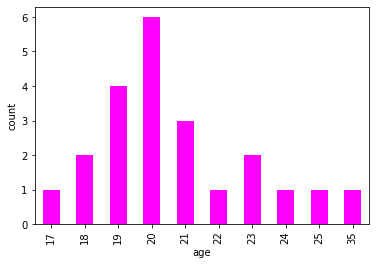

In [155]:
## Series bar chart
age_plot = ages.value_counts().sort_index().plot.bar(color='magenta')
age_plot.set(xlabel = "age", ylabel = "count")

In [67]:
# ages boolean
# what ages are in the range 18 to 20, inclusive?
print(ages[(ages >= 18) & (ages <= 20)])

# what percentage of students are in this age range?
print(len((ages[(ages >= 18) & (ages <= 20)]))/len(ages))




0     18
1     19
2     20
3     20
4     20
6     18
11    20
14    20
17    19
18    19
19    19
20    20
dtype: int64
0.5454545454545454


In [ ]:
# what percentage of  students are ages 18 OR 21?


# what percentage of students are NOT 19? 



In [ ]:
# Now let's do all this by reading in the CSV data from the class survey
# read in all the data

In [178]:
# Modified from https://automatetheboringstuff.com/chapter14/
import csv
def process_csv(filename):
    example_file = open(filename, encoding="utf-8")
    example_reader = csv.reader(example_file)
    example_data = list(example_reader)
    example_file.close()
    return example_data

data = process_csv("cs220_survey_data.csv")
header = data[0]
print(len(data))
data = data[1:]
data[:3]

897


[['LEC001', '19', 'Computer Science', 'basil/spinach'],
 ['LEC002', '18', 'Engineering', 'pineapple'],
 ['LEC003', '19', 'Business', 'pepperoni']]

In [176]:
# make a list comprehension of just the ages, but some ages are ''
age_list = [int(row[1]) for row in data if len(row[1]) > 0]
age_list[:5]

# put that into a Pandas Series
cs220_ages = pd.Series(age_list)
cs220_ages

0      19
1      18
2      19
3      19
4      19
       ..
877    19
878    20
879    21
880    19
881    18
Length: 882, dtype: int64

In [194]:
# find the mode
print(cs220_ages.mode())

# find the age of the 75th percentile
print(ages.quantile(.75))

# how many ages are > 25 ? 
print(len(cs220_ages[cs220_ages > 25]))





0    19
dtype: int64
21.75
20
16      1
17     11
18    214
19    290
20    178
21    101
22     41
23     13
24      6
25      7
26      4
27      2
28      3
29      2
30      2
31      1
32      1
33      1
34      1
35      1
37      1
46      1
dtype: int64


In [250]:
# make a Series of the counts of all the ages, sorted from most common to least 
cs220_ages.value_counts().sort_values()

# then sort it by index
cs220_ages.value_counts().sort_index()

16      1
17     11
18    214
19    290
20    178
21    101
22     41
23     13
24      6
25      7
26      4
27      2
28      3
29      2
30      2
31      1
32      1
33      1
34      1
35      1
37      1
46      1
dtype: int64

In [251]:
# make a bar chart of the ages sorted by age
#age_plot = cs220_ages.value_counts().sort_index().plot.bar(color='magenta')
#age_plot.set(xlabel = "age", ylabel = "count")

## A Series is a Cross between a list and a dict
## So we can make a series from a dict as well

In [223]:
## Series from a dict
game1points = pd.Series({"Chris": 10, "Kiara": 3, "Mikayla": 7, "Ann": 8, "Trish": 6})
print(game1points)
game2points = pd.Series({"Kiara": 7, "Chris": 3,  "Trish": 11, "Mikayla": 2, "Ann": 5 })
print(game2points)


Chris      10
Kiara       3
Mikayla     7
Ann         8
Trish       6
dtype: int64
Kiara       7
Chris       3
Trish      11
Mikayla     2
Ann         5
dtype: int64


In [230]:
# Pandas can perform operations on two series by matching up their indices
total = game1points + game2points
total

Ann        13
Chris      13
Kiara      10
Mikayla     9
Trish      17
dtype: int64

In [231]:
## Who has the most points?
print(total.max())
print(total.idxmax())


17
Trish


In [232]:
# we can use [] to name the index or by its sequence number
print(total['Kiara'], total[2])

10 10


In [233]:
# we can have multi-indexing....slightly different from slicing
total[  ["Chris", "Trish"]]

Chris    13
Trish    17
dtype: int64

In [234]:
total_sorted = total.sort_values(ascending=False)
total_sorted

Trish      17
Ann        13
Chris      13
Kiara      10
Mikayla     9
dtype: int64

Text(0, 0.5, 'total points')

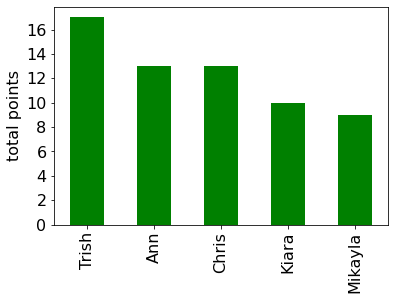

In [235]:
ax = total_sorted.plot.bar(color="green", fontsize=16)
ax.set_ylabel("total points", fontsize=16)

## Some weird things when using Series

In [ ]:
## Series use .loc and .iloc to access